### Classification non supervisée - Clustering

#### K-Means :

Un des algorithmes de clustering les plus répandus où l'on divise des observations en k partitions. Les données sont classées selon leurs ressemblances.

Cet algorithme va :
- placer trois points centroides au hasard;
- affecter chaque point du dataset au cluster du centroïde le plus proche;
- déplacer le centroïde au milieu du cluster jusqu'à ce que les centroïdes convergent vers une position d'équilibre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Création d'un dataset :
X, y = make_blobs(n_samples=100, centers=3, cluster_std= 0.4, random_state= 0)
# make_blobs : Générer des blobs
# n_samples : le nombre total de points également répartis entre les clusters
# centers : le nombre de centre à générer ou les emplacements fixes des centres.
# cluster_std : l'écart-type des clusters
# random_state : détermine la génération de nombres aléatoires
X

array([[ 2.28590385,  0.81434416],
       [ 0.61808345,  4.45854833],
       [ 2.43416831,  0.83565962],
       [ 0.33071094,  4.21869122],
       [ 0.55684889,  3.73578015],
       [ 0.83710522,  4.36632692],
       [-1.98589147,  2.74275424],
       [-1.14713569,  2.95290276],
       [ 2.32418542,  1.06064839],
       [ 0.72254124,  4.15869086],
       [ 1.2679063 ,  4.35538049],
       [ 1.46838635,  4.78473927],
       [ 2.2415325 ,  0.28316619],
       [ 1.58938176,  4.89153084],
       [-1.82480594,  2.58730685],
       [ 2.80229111,  1.26008152],
       [-1.56628502,  2.65249095],
       [ 0.65101157,  3.61327429],
       [-1.55420066,  3.60321935],
       [-1.96865735,  2.93874829],
       [-1.78435137,  2.028521  ],
       [-1.54261714,  2.45064486],
       [-1.2708514 ,  2.27109984],
       [ 0.62115578,  3.51146874],
       [ 1.62696647,  1.31944435],
       [ 2.10603236,  1.05845941],
       [ 1.74730109,  1.11336334],
       [ 1.58920759,  1.25799425],
       [-1.67457675,

In [3]:
y

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

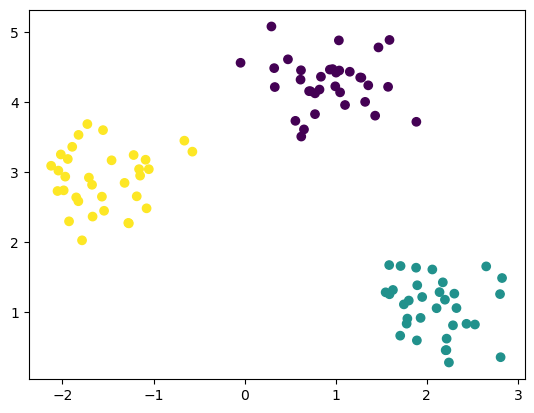

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y)
# L'aperçu des données
# Normalement on ne connaît pas initialement ces informations, 
# l'algorithme k-means permet de déterminer y

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 3)
y_hat = model.fit(X).labels_
# Les attributions de labels y_hat doivent être assez similaires y, 
# avec éventuellement un ré-agencement des couleurs

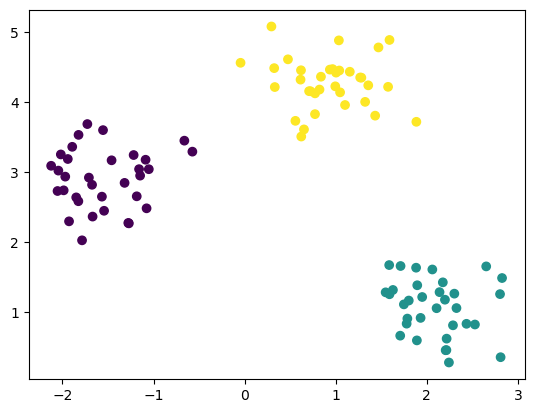

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = y_hat)

[[-1.55022199  2.90542155]
 [ 2.08889087  1.07930405]
 [ 0.92702654  4.27385438]]


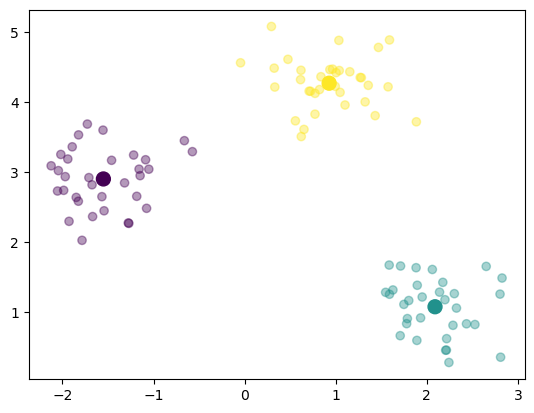

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = y_hat, alpha = 0.4)
mu = model.cluster_centers_
plt.scatter(mu[:, 0], mu[:, 1], s = 100, c = np.unique(y_hat))
print(mu)

# Aperçu des données avec les centroïdes mu

#### La méthode Elbow

Le but est de tracer l'évolution du coût du modèle en fonction du nombre de cluster et de détecter une zone de coude. Cette zone indique le nombre de cluster optimal, celui qui nous permet de réduire le coût du modèle tout en conservant un nombre raisonnable de cluster.

Text(0, 0.5, 'Coût du modèle (Inertia)')

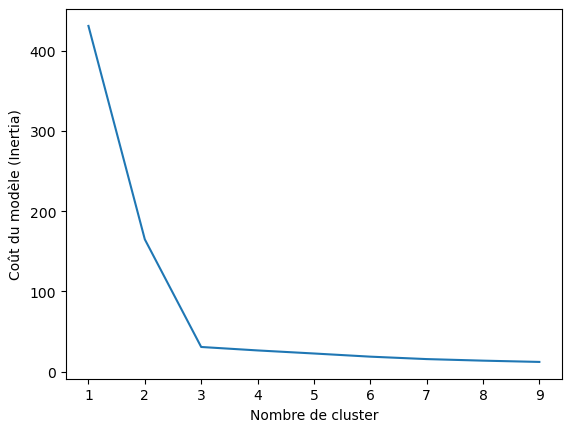

In [8]:
inertia = []
# Une liste qui va servir à enregister les coûts (inertia)
k_range = range(1, 10)
# renvoie une séquence de nombre allant de 1 à 9
for k in k_range:
    # Pour tout k allant de 1 à 9
    model = KMeans(n_clusters = k).fit(X)
    # Créer un modèle KMeans avec un nombre de cluster k
    inertia.append(model.inertia_)
    # Calculer et enregistrer les coûts
    
plt.plot(k_range, inertia)
# Tracer du coût en fonction de k_range
plt.xlabel('Nombre de cluster')
# Définissez l'étiquette de l'axe des x
plt.ylabel('Coût du modèle (Inertia)')
# Définissez l'étiquette de l'axe des y

La zone du coude indique un valeur optimal égale à 3

### Détection d'anomalies

### Isolation forest

Cet algorithme non supervisé permet de détecter des anomalies dans un jeu de données.Pour ce faire, isolation forest va isoler des données atypiques en calculant un score d'anomalie pour chaque observation du dataset en façon récursive.

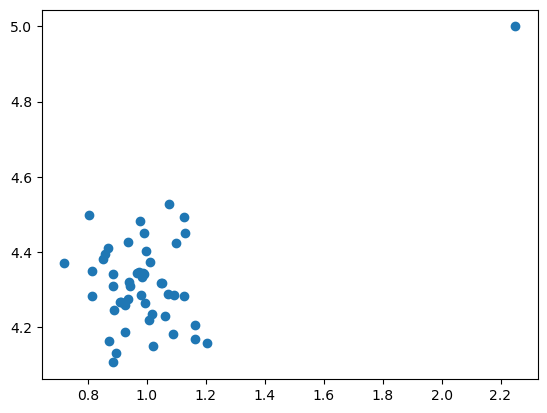

In [9]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

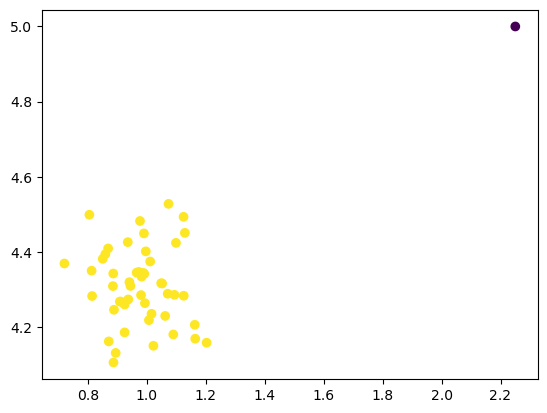

In [10]:
from sklearn.ensemble import IsolationForest
# Importer la bibliothèque IsolationForest

model = IsolationForest(contamination = 0.01)
# Contamination = 0.01 correspond au fait de demander au modèle de filtrer 1% d'anomalie dans le jeu de données
model.fit(X)
# Entraînement du modèle

plt.scatter(X[:, 0], X[:, 1], c = model.predict(X))
# Identifier l'anomalie en intégrant à la valeur de c = model.predict(X)

On remarque distinctement dans ce graphe l'identification de l'anomalie en haut à droite

#### Application : détection d'anomalies dans un jeu de données intégrant des chiffres écrit à la main

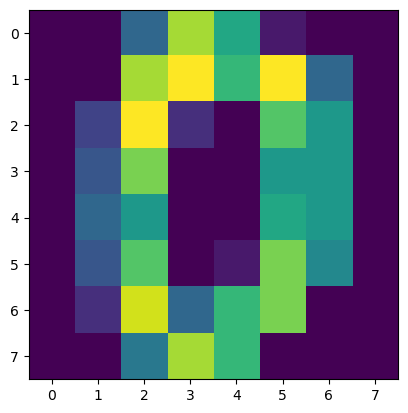

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()

images = digits.images
# digits.images retourne un tableau de forme (1797, 8 ,8)
X = digits.data
# Récupérer les données dans X
y = digits.target
# Récupérer les étiquettes dans y

plt.imshow(images[0])
# Afficher l'image à l'index 0

In [12]:
model = IsolationForest(contamination=0.02)
# Contamination de 2%
model.fit(X)
# Entraînement du modèle
outliers = model.predict(X) == -1 
# model.predict(X) renvoie un tableau booléens (1 pour les images correctes et -1 pour les outliers)
# outliers intègre que les anomalies

In [13]:
outliers
# Les true dans outliers correspondent aux anomalies

array([False, False, False, ..., False, False, False])

In [14]:
images[outliers][0]
# La première image des anomalies

array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

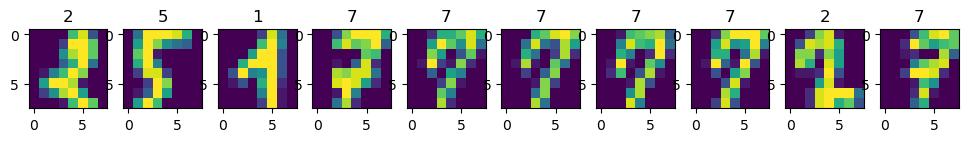

In [15]:
plt.figure(figsize=(12, 3))
# Configuration des dimension de la figure 
for i in range(10):
    # Pour tout i allant de 0 à 9
    plt.subplot(1, 10, i + 1)
    # Ajouter un axe à la figure actuelle
    # nrows = 1
    # ncols = 10
    # index = i + 1
    plt.imshow(images[outliers][i])
    # Afficher les données sous forme d'image 2D
    plt.title(y[outliers][i])
    # Afficher comme titre pour chaque image le numéro du chiffre concerné par l'anomalie

### Réduction de dimension 

#### Principal Component Analysis (PCA) ou analyse en composantes principales (ACP)

Réduire la dimensionnalité superflue d'un dataset en projetant ses données dans un espace de plus petite dimension (un espace avec moins de variables).

Le but est d'accélérer l'apprentissage de la machine et de lutter contre le fléau de la dimension (risque d'overfitting lié au surplus de dimension).

In [16]:
from sklearn.decomposition import PCA
# Importer la bibliothèque PCA

X.shape
# X correspond au dataset digit

(1797, 64)

In [17]:
model = PCA(n_components = 2)
model.fit(X)
# Entraînement du modèle. 

PCA(n_components=2)

In [18]:
x_reduced = model.transform(X)
x_reduced.shape

(1797, 2)

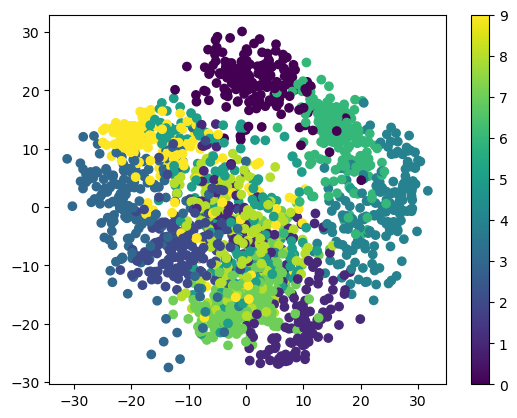

In [19]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c = y)
plt.colorbar()
# Afficher les données

In [20]:
model.components_.shape

(2, 64)

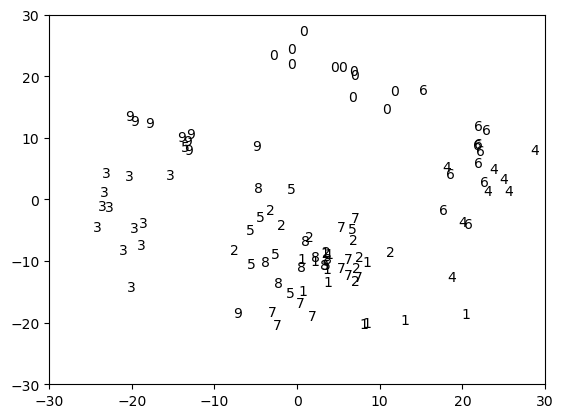

In [21]:
plt.figure()
plt.xlim(-30, 30)
# Obtenir ou définir les limites de x des axes actuels

plt.ylim(-30, 30)
# Obtenir ou définir les limites de y des axes actuels
for i in range(100):
    # Pour tout i allant de 0 à 99
    plt.text(x_reduced[i,0], x_reduced[i,1], str(y[i]))
    # Afficher les données avec comme marqueurs les étiquettes y

### Compression des données - Réduction de dimension :

In [22]:
n_dims = X.shape[1]
# 64
model = PCA(n_components = n_dims)
# Réduction de la dimensionnalité
model.fit(X)
# Entraînement du modèle

variances = model.explained_variance_ratio_
# Indique le pourcentage de variance préservée par chaque composante

variances

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [23]:
np.cumsum(variances)
# La somme cumulée de toutes les variances

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [24]:
meilleur_dims = np.argmax(np.cumsum(variances) > 0.95)
meilleur_dims
# On obtient la dimension pour 95% de variance du modèle

28

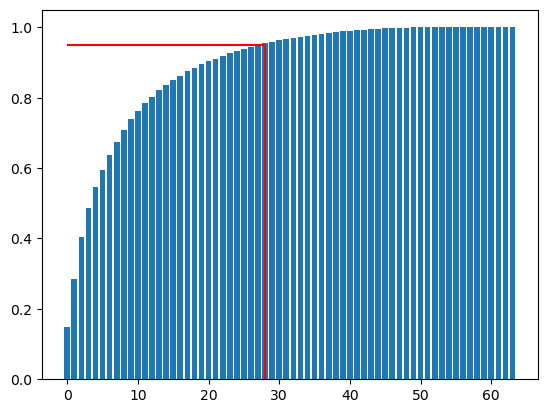

In [25]:
plt.bar(range(n_dims), np.cumsum(variances))
# Tracer un graphique en barre allant de 0 à n_dims, et de hauteur np.cumsum(variances)
plt.hlines(0.95, 0, meilleur_dims, colors='r')
# Tracer une ligne horizontale à chaque 0.90 de 0 à meilleur_dims
plt.vlines(meilleur_dims, 0, 0.95, colors='r')
# Tracer une ligne verticale à chaque 0.90 de 0 à meilleur_dims

In [26]:
model = PCA(n_components = 28)
X_reduced = model.fit_transform(X)
X_reduced.shape

(1797, 28)

Text(0.5, 1.0, 'Compressé')

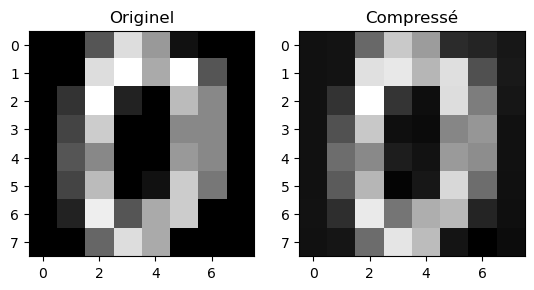

In [27]:
X_recovered = model.inverse_transform(X_reduced)
# Pour observer une image compressée, on utilise la méthode inverse_transform

plt.subplot(1, 2, 1)
# Ajouter un axe à la figure actuelle
# nrows = 1
# ncols = 2
# index = 1
plt.imshow(X[0,:].reshape((8, 8)), cmap = 'gray')
# Afficher X[0]
plt.title('Originel')
# Le titre de la figure

plt.subplot(1, 2, 2)
# Ajouter un axe à la figure actuelle
# nrows = 1
# ncols = 2
# index = 1
plt.imshow(X_recovered[0, :].reshape((8, 8)), cmap = 'gray')
# Afficher X_recovered[0]
plt.title('Compressé')
# Le titre de la figure

In [28]:
model = PCA(n_components = 0.95)
# Astuce : il est possible d'indiquer directement la variance recherchée dans n_components